
<h1>Sobre el paradigma divide y vencerás</h1> 
<p> 
    El paradigma divide y vencerás consiste en dividir el problema en varias partes, 
    resolver cada una de ellas recursivamente y combinarlas para resolver el problema 
    original. Para analizar el tiempo de ejecución de un algoritmo que sigue este paradigma de diseño generalmente 
    se tiene que resolver una relación de recurrencia que acota el tiempo recursivamente en terminos de 
    intancias más pequeñas del mismo problema. El primer ejemplo para ilustrar este paradigma es Mergesort</p> 
<h1>Mergesort</h1> 
<p>El problema es muy simple: Ordenar un arreglo de números. Como dijimos anteriormente este algoritmo sigue el paradigma de diseño de Mergesort. Parte el arreglo en mitades, resuelve recursivamente y combina el resultado de las llamadas recursivas. A continuación se muestra como funciona la rutina para combinar en $O(n)$:</p> 


Output()

<IPython.core.display.Javascript object>


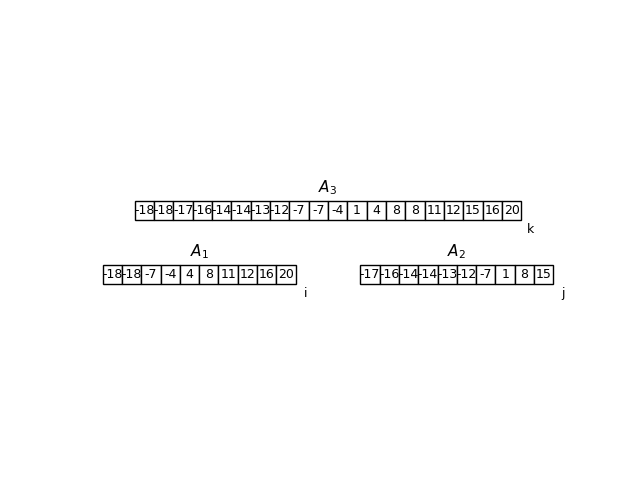

In [121]:
%run rutina_merge.ipynb 

<p> La rutina anterior funciona de la siguiente manera: Se comparan los números $A_1[i]$ y $A_2[j]$, el número menor se asigna $A_3[k]$ y se aumenta el indice $k$ y el índice del arreglo cuyo número haya sido menor. El algoritmo concluye cuando ambos arreglos $A_1$ y $A_2$ hayan sido combinados en $A_3$. </p> 
<p> Ahora, ya que conocemos como opera la rutina para combinar, la siguiente celda ilustra el funcionamiento completo del algoritmo mergesort </p>  

Output()

<IPython.core.display.Javascript object>


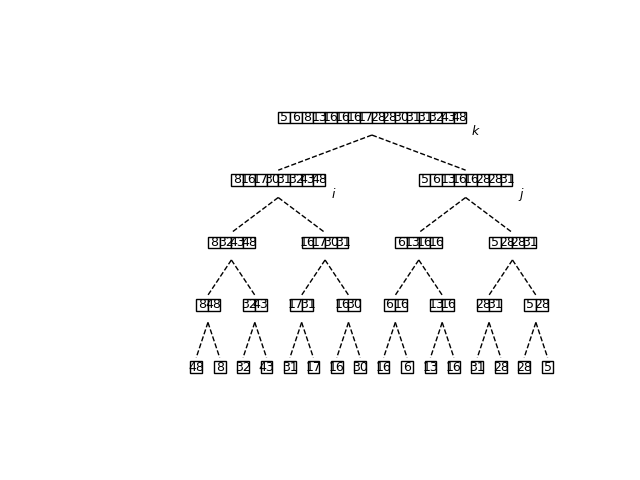

In [123]:
%run mergesort_alg.ipynb 

<h1> Analizando la relación de recurrencia de Mergesort</h1>
<p> 
    Sea $T(n)$ el tiempo de ejecución en el peor de los casos para una entrada de tamaño $n$ y supongamos que $n$ es par.  
    El algoritmo tarda $O(n)$ en dividir la entrada en dos pedazos de tamaño $\frac{n}{2}$, luego para cada uno de estos 
    pedazos tardará $T(\frac{n}{2})$ (pues son instancias más chicas del problema original) y finalmente 
    $O(n)$ para combinar las soluciones de las llamadas recursivas. De modo que el tiempo de ejecución 
    satisface la siguiente relación de recurrencia: 
</p> 
<p>Para alguna constante $c$, $$ T(n) \leq 2 T(n/2) + cn $$ cuando $n > 2$ y $$ T(2) \leq c $$  </p> 
<p> Sin embargo las desigualdades anteriores no proveen una cota especifica para la función $T$. Para obtener 
    tal cota tenemos que resolver la relación de recurrencia de manera que $T$ solo aparezca al lado izquierdo de la
    desigualdad</p> 

<h1> Formas de resolver una relación de recurrencia </h1> 
<ul>
  <li>La forma más natural de resolver una relación de recurrencia es "desdoblar" la recursión, 
      contando el tiempo de ejecución en lo primeros niveles. Luego encontrar un patrón a medida que
      la recursión se expande. Se suma este tiempo de ejecución para todos los niveles y llegamos
      a un tiempo de ejecución total
  </li>
  <li>
      Una segunda forma es comenzar por una estimación de la solución, sustituirla en la relación de recurrencia
      y ver si funciona. Formalmente tiene que ser justificado usando un argumento por inducción sobre $n$ 
    
   </li>
</ul>



<h1>Desdoblar la recurrencia de Mergesort</h1> 
Veamos la siguiente imagen:
<img src="fig1.png">
<ul> 
<li> 
    <b> Analizando los primero niveles: </b>  
En el primer nivel de recursión, tenemos un solo problema de tamaño $n$ que toma a lo más $cn$ más el tiempo gastado 
en las llamadas recursivas sucesivas. En el siguiente tenemos dos problemas, cada uno de estos toma $\frac{cn}{2}$ 
para un total de $cn$ mas el tiempo de las llamadas sucesivas. En el tercer nivel tenemos 4 problemas 
cada uno de tamano $\frac{n}{4}$, cada uno toma tiempo $\frac{cn}{4}$ para un total de a lo más $cn$ más el tiempo de las llamadas sucesivas.  
    </li> 
    <li> 
        <b> Identificando un patron: </b> 
        En el nivel de recursión $j$ tenemos que el número de subproblemas se ha doblado $j$ veces para un total de 
        $2^j$ subproblemas. Cada uno ha reducido su tamano en un factor de 2, $j$ veces y por lo tanto tiene un 
        tamano de $\frac{n}{2^j}$. Y entonces, cada uno de estos, tiene una cota máxima de $\frac{cn}{2^j}$. 
        De modo que el nivel $j$ contribuye en de $2^j(\frac{cn}{2^j}) = cn$ al tiempo de ejecución total. 
    </li> 
<li> 
    <b>Sumar sobre todos los niveles de recursión: </b> 
La imagen anterior ilustra que para cada uno de los niveles la misma cota $cn$ aplica si tomamos en cuenta el tiempo de ejecución total. Ahora, el número de veces que la entrada tiene que ser dividida a la mitad para reducir su tamaño de $n$ a 2 es $log_2(n)$. Por lo tanto, si sumamos el trabajo de $cn$ para cada uno de los $log_2(n)$ niveles, 
    tenemos un tiempo de ejecución total de $O(n \log(n))$ 
    </li> 
</ul> 

<h1> Sustitución de una estimación</h1> 
Supongamos que creemos que $T(n) \leq cn\log_2(n)$ para todo $n \geq 2$. Esto es cierto para $n = 2$, ya que en este caso $cn\space log_2 n= 2c$ y relación de recurrencia nos dice explícitamente que $T(2) \leq c$. Ahora supongamos por inducción que $T(m) \leq cm \space \log_2m$ para todos los valores de $m$ menores que $n$ y que queremos establecer la desigualdad 
parea $T(n)$. Entonces tenemos lo siguiente: consideremos primero la relación de recurrencia: 
$$T(n) \leq 2 T(n/2) + cn $$
Ahora, por hipótesis de inducción tenemos que 
$$T(n/2) \leq c(n/2)\log_2(n/2)$$
Sustituyéndola y tomando en cuenta que $\log_2(n/2) = (\log_2 n) -1 $: 
\begin{equation}
\begin{split}
T(n)\leq 2c(n/2)\log_2(n/2) + cn = \\
cn \lbrack(\log_2n)- 1 \rbrack + cn = \\ 
(cn\space \log_2 n) - cn + cn = \\ 
cn\space \log_2 n 
\end{split}
\end{equation}
Esto concluye con el argumento por inducción y demuestra la cota para $T(n)$. 